# Rule Discovery with RUX and RUG

In this short note, we use two standard datasets to demonstrate how to use Rule Extractor (RUX) and the rule generator (RUG) algorithms. First we start with importing the necessary packages that we will use in this note. Note that both RUX and RUG are imported from `ruxg`.

In [1]:
import numpy as np
import pandas as pd
import Datasets as DS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from ruxg import RUXClassifier, RUGClassifier

You can find this dataset and its description on [this page](https://archive.ics.uci.edu/ml/datasets/ecoli). This dataset has 336 samples with seven features and eight classes. The very last column of the dataframe gives the class labels.

In [2]:
df = np.array(DS.ecoli('datasets/'))
X = df[:, 0:-1]
y = df[:, -1]
print('Number of samples: ', len(y))
print('number of features: ', len(X[0,:]))
print('Number of classes: ', len(np.unique(y)))

Number of samples:  336
number of features:  7
Number of classes:  8


To use RUX for interpretation, we first train a Random Forest model, an AdaBoost model, and a Gradient Booosting model. The depth of the trees in each one of the three ensemble methods is set to three.

In [3]:
randomState = 21
maxDepth = 3

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=randomState)

# Random Forest
RF = RandomForestClassifier(max_depth=maxDepth, random_state=randomState)
RF_pred = RF.fit(X_train, y_train).predict(X_test)

# AdaBoost
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=maxDepth),
                            algorithm='SAMME',
                            random_state=randomState)
ADA_pred = ADA.fit(X_train, y_train).predict(X_test)

# Gradient Boosting
GB = GradientBoostingClassifier(max_depth=maxDepth, random_state=randomState)
GB_pred = GB.fit(X_train, y_train).predict(X_test)

Next, we use RUX to discover the most prominent rules within each ensemble for interpretation. While interpreting the trained models, we use the rule length as a cost parameter.

In [4]:
# RUX(RF)
RUXRF = RUXClassifier(trained_ensemble=RF,
                        rule_length_cost=True,
                        random_state=randomState)
RUXRF_pred = RUXRF.fit(X_train, y_train).predict(X_test)

# RUX(ADA)
RUXADA = RUXClassifier(trained_ensemble=ADA,
                        rule_length_cost=True,
                        random_state=randomState)
RUXADA_pred = RUXADA.fit(X_train, y_train).predict(X_test)

# RUX(GB)
RUXGB = RUXClassifier(trained_ensemble=GB,
                        rule_length_cost=True,
                        random_state=randomState)
RUXGB_pred = RUXGB.fit(X_train, y_train).predict(X_test)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-14


Our second algorithm RUG itself is a classifier that can be trained like other learning algorithms.

In [5]:
#RUG
RUG = RUGClassifier(max_depth=maxDepth,
                    rule_length_cost=True,
                    random_state=randomState)
RUG_pred = RUG.fit(X_train, y_train).predict(X_test)

Here are the accuracies that we obtain with all algorithms.

In [6]:
print('## Accuracy Scores ##')
print('Random Forest: ', accuracy_score(RF_pred, y_test))
print('AdaBoost: ', accuracy_score(ADA_pred, y_test)) 
print('Gradient Boosting: ', accuracy_score(GB_pred, y_test)) 
print('RUX(RF): ', accuracy_score(RUXRF_pred, y_test))
print('RUX(ADA): ', accuracy_score(RUXADA_pred, y_test))
print('RUX(GB): ', accuracy_score(RUXADA_pred, y_test))
print('RUG: ', accuracy_score(RUG_pred, y_test))

## Accuracy Scores ##
Random Forest:  0.9166666666666666
AdaBoost:  0.8571428571428571
Gradient Boosting:  0.8571428571428571
RUX(RF):  0.7857142857142857
RUX(ADA):  0.7857142857142857
RUX(GB):  0.7857142857142857
RUG:  0.8928571428571429


As you can see, we obtain good accuracies with all the methods. Let's see the total number of rules each method produces.

In [7]:
print('## Number of Rules ##')
print('Random Forest: ', RUXRF.get_init_num_of_rules())
print('AdaBoost: ', RUXADA.get_init_num_of_rules())
print('Gradient Boosting: ', RUXGB.get_init_num_of_rules())
print('RUX(RF): ', RUXRF.get_num_of_rules())
print('RUX(ADA): ', RUXADA.get_num_of_rules())
print('RUX(GB): ', RUXGB.get_num_of_rules())
print('RUG: ', RUG.get_num_of_rules())

## Number of Rules ##
Random Forest:  761
AdaBoost:  374
Gradient Boosting:  792
RUX(RF):  34
RUX(ADA):  39
RUX(GB):  32
RUG:  15


RUX and RUG models produce significantly less number of rules than the ensemble methods. In addition, we can also check the average number of rules per sample. This value could give us an idea about the difficulty of a local explanation.

In [8]:
print('RUX(RF): ', RUXRF.get_avg_num_rules_per_sample())
print('RUX(ADA): ', RUXADA.get_avg_num_rules_per_sample())
print('RUX(GB): ', RUXGB.get_avg_num_rules_per_sample())
print('RUG: ', RUG.get_avg_num_rules_per_sample())

RUX(RF):  6.654761904761905
RUX(ADA):  6.690476190476191
RUX(GB):  6.380952380952381
RUG:  2.7738095238095237


RUG produces on average less than three rules per sample for classification. We can also look at the discovered rules. Here are the **first five** rules sorted in descending order of weights.

In [9]:
RUG.print_rules(indices=range(5))

RULE 0:
x[2] <= 0.74
x[0] <= 0.62
x[5] > 0.57

Class: 1
Scaled rule weight: 1.0000

RULE 1:
x[5] > 0.51
x[2] > 0.74
x[6] <= 0.61

Class: 6
Scaled rule weight: 0.9848

RULE 2:
x[1] > 0.56
x[4] > 0.53
x[6] <= 0.61

Class: 5
Scaled rule weight: 0.9376

RULE 3:
0.25 < x[6] <= 0.61
x[4] > 0.65

Class: 5
Scaled rule weight: 0.9376

RULE 4:
0.62 < x[0] <= 0.75
x[5] > 0.57

Class: 1
Scaled rule weight: 0.8222



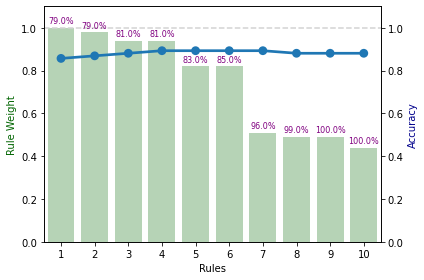

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

selectedRuleNum = 10 

weights = np.round(RUG.get_weights()[:selectedRuleNum], decimals=2)
accuracies = []
coverages = []

for indx in range(min(selectedRuleNum, RUG.get_num_of_rules())):
    # Use only the first indx+1 many rules for prediction
    RUG_pred_test = RUG.predict(X_test, range(indx+1))
    accuracies.append(accuracy_score(RUG_pred_test, y_test))
    coverages.append(RUG.get_num_of_missed())
    
accuracies = np.round(accuracies, decimals=3)
coverages = np.round(1.0-(np.array(coverages)/len(y)), decimals=2)*100
coverages = np.round(coverages, decimals=1)
txtmisses = [str(cover)+'%' for cover in coverages]


# Plotting
data = {'Rules': [indx+1 for indx in range(len(accuracies))],
        'Weights': weights,
        'Coverages': coverages,
        'Accuracies': accuracies}

df = pd.DataFrame(data, columns=data.keys())

fig, ax1 = plt.subplots()
sns.color_palette('pastel')

bars = sns.barplot(data=df, x='Rules', y=weights, ax=ax1, 
                   color='green', alpha=0.3)

for indx, txtmiss in enumerate(txtmisses):
    bars.annotate(txtmiss, xy=(indx, weights[indx]+0.02), 
                  color='purple', horizontalalignment='center',
                  fontsize=8)

bars.axhline(1.0, color='lightgray', linestyle='--')
    
ax1.set_ylabel('Rule Weight', color='darkgreen')
ax1.set_ylim([0.0, 1.1])

ax2 = ax1.twinx()

sns.pointplot(data=df, x='Rules', y='Accuracies', ax=ax2)
ax2.set_ylabel('Accuracy', color='darkblue')
ax2.set_ylim(ax1.get_ylim())
ax2.grid(False)

fig.tight_layout()

This interpretation plot shows that RUG reaches a high accuracy with the first 10 rules that are ordered in terms of their normalized weights (bar heights). The percentages show the
cumulative fractions of the samples covered after adding each rule.